In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle

## Loading Test Results

In [2]:
test_res = None
with open('test_res.pkl' , 'rb') as f:
    test_res = pickle.load(f)

In [3]:
test_res_df = pd.DataFrame(test_res)

In [4]:
sim = test_res_df['avg_similarity_acc']
time = test_res_df['avg_time_acc']
clus = test_res_df['clusters_nums_acc']
rad = test_res_df['search_radiuss_acc']
ind = test_res_df['index_building_time_acc']

## Accuracy Vs Time

in this section we will examine the relationship between accuracy (Average Similarity) and the time consumed by search as the number of the clusters in the index and the search radius change

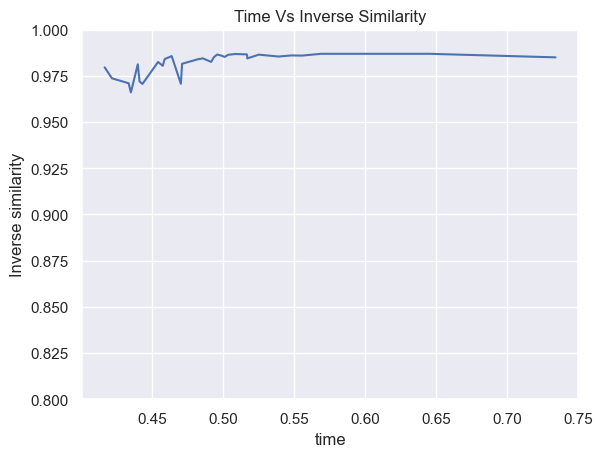

In [5]:
# Time Vs Similarity 
plt.plot(time[time.argsort()],1 /sim[time.argsort()])
plt.ylim(.8,1)
plt.xlabel('time')
plt.ylabel('Inverse similarity')
plt.title('Time Vs Inverse Similarity')
plt.show()

As seen Above, in general as the time consumed declines as a result of increasing the number of clusters used by the index and the search radius the Average similarity between the search results and the test batch tend not to be significantly affected.

now we will take a closer look at this by seeing how time and accuracy get affected by the change of number of clusters and search radius

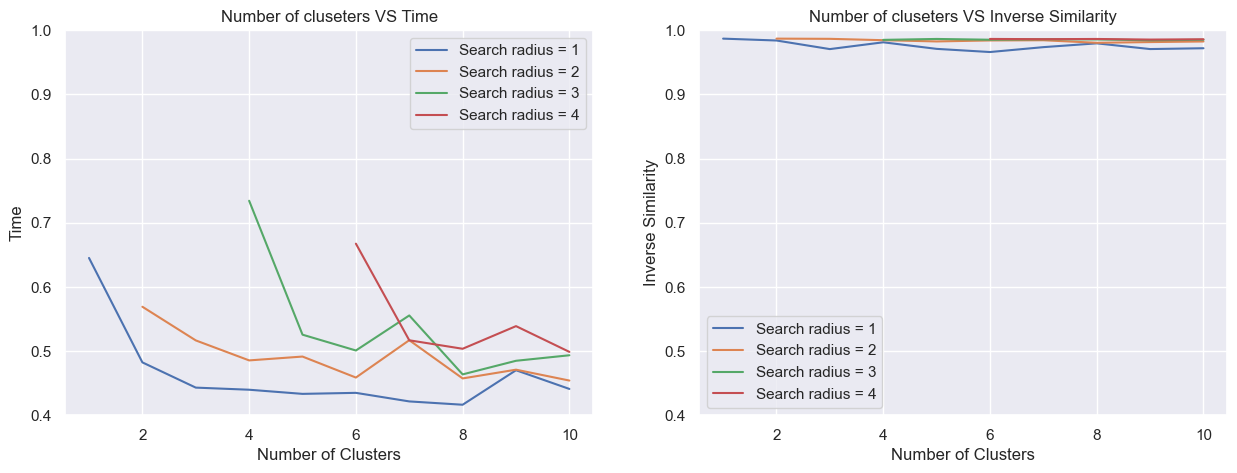

In [6]:
# Time Vs Similarity changes as the number of clusters and search radius change
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(clus[rad == 1], time[rad == 1], label = 'Search radius = 1')
plt.plot(clus[rad == 2], time[rad == 2], label = 'Search radius = 2')
plt.plot(clus[rad == 3], time[rad == 3], label = 'Search radius = 3')
plt.plot(clus[rad == 4], time[rad == 4], label = 'Search radius = 4')

plt.xlabel('Number of Clusters')
plt.ylabel('Time')
plt.title('Number of cluseters VS Time')
plt.ylim(0.4,1)
plt.legend()

plt.subplot(1,2,2)
plt.plot(clus[rad == 1], 1 / sim[rad == 1], label = 'Search radius = 1')
plt.plot(clus[rad == 2], 1 / sim[rad == 2], label = 'Search radius = 2')
plt.plot(clus[rad == 3], 1 / sim[rad == 3], label = 'Search radius = 3')
plt.plot(clus[rad == 4], 1 / sim[rad == 4], label = 'Search radius = 4')
plt.xlabel('Number of Clusters')
plt.ylabel('Inverse Similarity')
plt.title('Number of cluseters VS Inverse Similarity')
plt.ylim(0.4,1)

plt.legend()
plt.savefig('Number of cluseters VS Inverse Similarity')
plt.show()

Again we can see that as the number of clusters increases we can get higher performance without any significant effect on the accuracy and this hold still even with lower search radiuses.

## Index building time

Now we will investigate how does the index building time get affected by changing the number of clusters

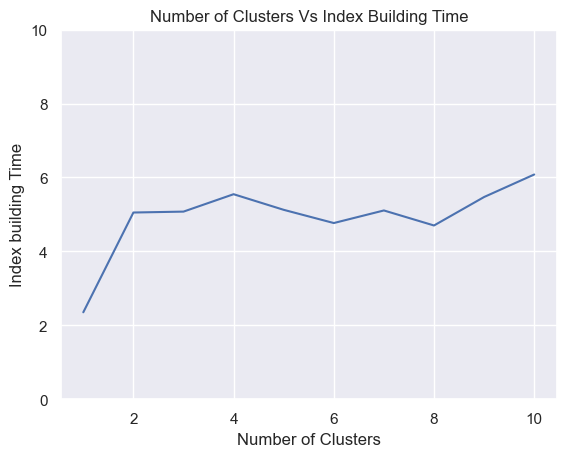

In [7]:
# Index building time Vs Number of clusters
plt.plot(clus,ind)
plt.xlabel('Number of Clusters')
plt.ylabel('Index building Time')
plt.title('Number of Clusters Vs Index Building Time')
plt.ylim(0,10)
plt.show()

Here we can see that while not using clusters (1 cluster) the time needed to build the index is about **2 seconds** and this increases to more than **5 seconds** while using 2 clusters However increasing the number of clusters from 2 to 10 clusters hardly increases the time more than 1 second to approach **6 seconds** so we can safely assume that increasing the number of clusters has a limited effect on the index building time.